1/1 [==============================] - 0s 415ms/step
The shape of conv2d_36 is (1, 298, 298, 256)
The shape of activation_56 is (1, 298, 298, 256)
The shape of max_pooling2d_36 is (1, 149, 149, 256)
The shape of dropout_6 is (1, 149, 149, 256)
The shape of conv2d_37 is (1, 147, 147, 256)
The shape of activation_57 is (1, 147, 147, 256)
The shape of max_pooling2d_37 is (1, 73, 73, 256)
The shape of dropout_7 is (1, 73, 73, 256)
The shape of conv2d_38 is (1, 71, 71, 128)
The shape of activation_58 is (1, 71, 71, 128)
The shape of max_pooling2d_38 is (1, 35, 35, 128)
The shape of dropout_8 is (1, 35, 35, 128)
The shape of flatten_18 is (1, 156800)
The shape of dense_36 is (1, 64)
The shape of activation_59 is (1, 64)
The shape of dropout_9 is (1, 64)
The shape of dense_37 is (1, 1)
The shape of activation_60 is (1, 1)


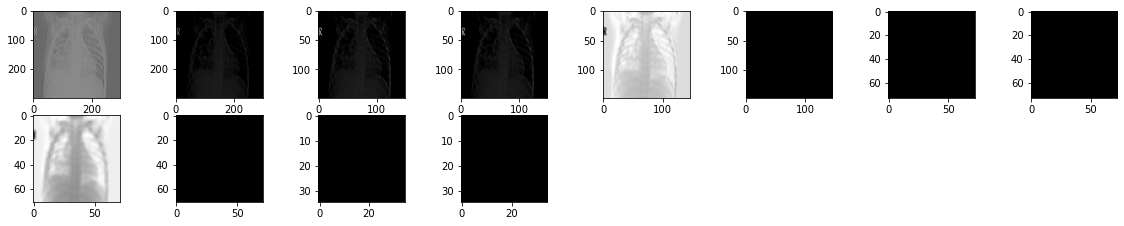

In [117]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import convert_image_dtype
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from matplotlib import pyplot


# Load the model
model = load_model('64x3-CNN.model')

# Get the output of each layer in the model
layer_outputs = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Create the feature map model with the same input shape as the original model
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

image_path = '/Users/rohinv/Downloads/archive/val/opacity/OPACITY.jpeg'
pil_image = load_img(image_path, target_size=(300, 300))
pil_image = Image.open(image_path)
resize_image=pil_image.resize((300,300))
img = resize_image.convert("L")

input_array = img_to_array(img)
input_array /= 255.0

# Convert RGB image to grayscale
img = convert_image_dtype(input_array, dtype=tf.float32)

# Expand dimensions to match the input shape of the feature map model
input_array = np.expand_dims(input_array, axis=0)

# Predict the feature maps
feature_maps = feature_map_model.predict(input_array)

for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of {layer_name} is {feature_map.shape}")

fig = pyplot.figure(figsize=(20, 15))
for i, feature_map in enumerate(feature_maps):
    if len(feature_map.shape) == 4:
        # Handle 4-dimensional feature maps
        pyplot.subplot(8, 8, i+1)
        pyplot.imshow(feature_map[0, :, :, 0], cmap='gray')
    elif len(feature_map.shape) == 3:
        # Handle 3-dimensional feature maps
        pyplot.subplot(8, 8, i+1)
        pyplot.imshow(feature_map[:, :, 0], cmap='gray')
pyplot.show()